In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score,accuracy_score

from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

In [12]:
data = pd.read_csv("data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
data.drop(['Id'], axis=1,inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
features = data.drop('SalePrice',axis=1)
features.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [15]:
labels = data['SalePrice']
labels.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [16]:
#SaleCondition  = data['SaleCondition']
#SaleCondition.head()
#print(pd.get_dummies(SaleCondition))
#SaleCondition = pd.get_dummies(SaleCondition)

string_col = features.select_dtypes(include = 'object')
col_categorical = pd.get_dummies(string_col)
col_categorical.head()

col_string_name=string_col.columns.values.tolist()

for name in col_string_name:
    features = features.drop(name,axis=1)

In [17]:
features = pd.concat([features,col_categorical], axis=1)
features.fillna(features.mean(),inplace=True)
features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0
6,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,1,0,0,0,0,1,0
7,60,70.049958,10382,7,6,1973,1973,240.0,859,32,...,0,0,0,1,0,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851,0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [20]:
data_dmatrix = xgb.DMatrix(data=features,label=labels)

In [91]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear')
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.8473288382898705


In [79]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.head(25)

,Actual,Predicted
892,154500,144595.859375
1105,325000,341394.687500
413,115000,119980.820312
522,159000,143778.390625
1036,315500,326710.437500
614,75500,79731.429688
218,311500,231371.140625
1160,146000,143966.531250
649,84500,80764.523438
887,135500,131693.484375


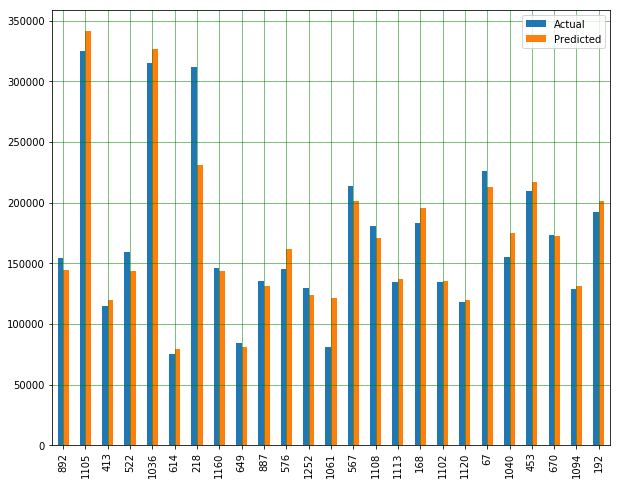

In [80]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [83]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 100)]
colsample_bytree = [float(x) for x in np.linspace(start = 0.01,stop=0.3,num=10)]
learning_rate = [float(x) for x in np.linspace(0.01, 0.99, num = 10)]
max_depth = [int(x) for x in np.linspace(5,200,num=50)]
subsample = [float(x) for x in np.linspace(start = 0.01,stop=0.3,num=10)]
lamda = [float(x) for x in np.linspace(start = 0.01,stop=10,num=30)]



random_grid = {'n_estimators': n_estimators,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'subsample' : subsample,
               'lambda' : lamda
              }

print(random_grid)

{'colsample_bytree': [0.01, 0.042222222222222223, 0.07444444444444444, 0.10666666666666666, 0.1388888888888889, 0.1711111111111111, 0.20333333333333334, 0.23555555555555557, 0.2677777777777778, 0.3], 'learning_rate': [0.01, 0.11888888888888888, 0.22777777777777777, 0.33666666666666667, 0.44555555555555554, 0.5544444444444444, 0.6633333333333333, 0.7722222222222221, 0.8811111111111111, 0.99], 'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000], 'subsample': [0.01, 0.042222222222222223

In [84]:
rf_random = RandomizedSearchCV(estimator = xg_reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] colsample_bytree=0.106666666667, learning_rate=0.554444444444, n_estimators=80, subsample=0.203333333333, max_depth=24, lambda=7.93310344828 
[CV] colsample_bytree=0.106666666667, learning_rate=0.554444444444, n_estimators=80, subsample=0.203333333333, max_depth=24, lambda=7.93310344828 
[CV] colsample_bytree=0.106666666667, learning_rate=0.554444444444, n_estimators=80, subsample=0.203333333333, max_depth=24, lambda=7.93310344828 
[CV] colsample_bytree=0.267777777778, learning_rate=0.01, n_estimators=1740, subsample=0.106666666667, max_depth=88, lambda=5.17724137931 
[CV]  colsample_bytree=0.106666666667, learning_rate=0.554444444444, n_estimators=80, subsample=0.203333333333, max_depth=24, lambda=7.93310344828, total=   0.4s
[CV] colsample_bytree=0.267777777778, learning_rate=0.01, n_estimators=1740, subsample=0.106666666667, max_depth=88, lambda=5.17724137931 
[CV]  colsample_bytree=0.106666666667, learning_rate=0.5

[CV]  colsample_bytree=0.171111111111, learning_rate=0.772222222222, n_estimators=1120, subsample=0.0422222222222, max_depth=36, lambda=8.96655172414, total=   2.6s
[CV] colsample_bytree=0.171111111111, learning_rate=0.772222222222, n_estimators=1120, subsample=0.0422222222222, max_depth=36, lambda=8.96655172414 
[CV]  colsample_bytree=0.171111111111, learning_rate=0.445555555556, n_estimators=780, subsample=0.106666666667, max_depth=152, lambda=1.04344827586, total=   4.3s
[CV] colsample_bytree=0.235555555556, learning_rate=0.336666666667, n_estimators=300, subsample=0.203333333333, max_depth=164, lambda=4.14379310345 
[CV]  colsample_bytree=0.171111111111, learning_rate=0.445555555556, n_estimators=780, subsample=0.106666666667, max_depth=152, lambda=1.04344827586, total=   4.0s
[CV] colsample_bytree=0.235555555556, learning_rate=0.336666666667, n_estimators=300, subsample=0.203333333333, max_depth=164, lambda=4.14379310345 
[CV]  colsample_bytree=0.171111111111, learning_rate=0.7722

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.3s


[CV]  colsample_bytree=0.3, learning_rate=0.336666666667, n_estimators=480, subsample=0.106666666667, max_depth=200, lambda=2.76586206897, total=   2.9s
[CV] colsample_bytree=0.3, learning_rate=0.336666666667, n_estimators=480, subsample=0.106666666667, max_depth=200, lambda=2.76586206897 
[CV]  colsample_bytree=0.3, learning_rate=0.336666666667, n_estimators=480, subsample=0.106666666667, max_depth=200, lambda=2.76586206897, total=   3.1s
[CV] colsample_bytree=0.3, learning_rate=0.336666666667, n_estimators=480, subsample=0.106666666667, max_depth=200, lambda=2.76586206897 
[CV]  colsample_bytree=0.3, learning_rate=0.336666666667, n_estimators=480, subsample=0.106666666667, max_depth=200, lambda=2.76586206897, total=   2.8s
[CV] colsample_bytree=0.3, learning_rate=0.336666666667, n_estimators=200, subsample=0.171111111111, max_depth=88, lambda=8.96655172414 
[CV]  colsample_bytree=0.3, learning_rate=0.336666666667, n_estimators=200, subsample=0.171111111111, max_depth=88, lambda=8.966

[CV]  colsample_bytree=0.235555555556, learning_rate=0.881111111111, n_estimators=740, subsample=0.0744444444444, max_depth=28, lambda=0.698965517241, total=   2.3s
[CV] colsample_bytree=0.235555555556, learning_rate=0.881111111111, n_estimators=740, subsample=0.0744444444444, max_depth=28, lambda=0.698965517241 
[CV]  colsample_bytree=0.235555555556, learning_rate=0.881111111111, n_estimators=740, subsample=0.0744444444444, max_depth=28, lambda=0.698965517241, total=   2.4s
[CV] colsample_bytree=0.235555555556, learning_rate=0.554444444444, n_estimators=180, subsample=0.203333333333, max_depth=112, lambda=1.04344827586 
[CV]  colsample_bytree=0.203333333333, learning_rate=0.118888888889, n_estimators=760, subsample=0.203333333333, max_depth=12, lambda=6.21068965517, total=   4.8s
[CV] colsample_bytree=0.235555555556, learning_rate=0.554444444444, n_estimators=180, subsample=0.203333333333, max_depth=112, lambda=1.04344827586 
[CV]  colsample_bytree=0.203333333333, learning_rate=0.1188

[CV] colsample_bytree=0.267777777778, learning_rate=0.336666666667, n_estimators=400, subsample=0.0744444444444, max_depth=136, lambda=3.79931034483 
[CV]  colsample_bytree=0.138888888889, learning_rate=0.227777777778, n_estimators=880, subsample=0.267777777778, max_depth=148, lambda=0.698965517241, total=   5.8s
[CV] colsample_bytree=0.267777777778, learning_rate=0.336666666667, n_estimators=400, subsample=0.0744444444444, max_depth=136, lambda=3.79931034483 
[CV]  colsample_bytree=0.138888888889, learning_rate=0.227777777778, n_estimators=880, subsample=0.267777777778, max_depth=148, lambda=0.698965517241, total=   5.8s
[CV] colsample_bytree=0.106666666667, learning_rate=0.663333333333, n_estimators=740, subsample=0.267777777778, max_depth=128, lambda=7.24413793103 
[CV]  colsample_bytree=0.138888888889, learning_rate=0.227777777778, n_estimators=880, subsample=0.267777777778, max_depth=148, lambda=0.698965517241, total=   6.1s
[CV] colsample_bytree=0.106666666667, learning_rate=0.66

[CV]  colsample_bytree=0.0744444444444, learning_rate=0.445555555556, n_estimators=1120, subsample=0.106666666667, max_depth=156, lambda=10.0, total=   3.0s
[CV] colsample_bytree=0.138888888889, learning_rate=0.118888888889, n_estimators=1120, subsample=0.106666666667, max_depth=100, lambda=5.86620689655 
[CV]  colsample_bytree=0.0744444444444, learning_rate=0.445555555556, n_estimators=1120, subsample=0.106666666667, max_depth=156, lambda=10.0, total=   3.1s
[CV] colsample_bytree=0.01, learning_rate=0.772222222222, n_estimators=740, subsample=0.203333333333, max_depth=172, lambda=7.58862068966 
[CV]  colsample_bytree=0.01, learning_rate=0.772222222222, n_estimators=740, subsample=0.203333333333, max_depth=172, lambda=7.58862068966, total=   1.0s
[CV] colsample_bytree=0.01, learning_rate=0.772222222222, n_estimators=740, subsample=0.203333333333, max_depth=172, lambda=7.58862068966 
[CV]  colsample_bytree=0.138888888889, learning_rate=0.118888888889, n_estimators=1120, subsample=0.1066

[CV] colsample_bytree=0.171111111111, learning_rate=0.554444444444, n_estimators=560, subsample=0.235555555556, max_depth=188, lambda=8.62206896552 
[CV]  colsample_bytree=0.171111111111, learning_rate=0.336666666667, n_estimators=1000, subsample=0.106666666667, max_depth=168, lambda=7.58862068966, total=   4.9s
[CV] colsample_bytree=0.0422222222222, learning_rate=0.663333333333, n_estimators=480, subsample=0.171111111111, max_depth=144, lambda=4.83275862069 
[CV]  colsample_bytree=0.171111111111, learning_rate=0.554444444444, n_estimators=560, subsample=0.235555555556, max_depth=188, lambda=8.62206896552, total=   4.5s
[CV] colsample_bytree=0.0422222222222, learning_rate=0.663333333333, n_estimators=480, subsample=0.171111111111, max_depth=144, lambda=4.83275862069 
[CV]  colsample_bytree=0.0422222222222, learning_rate=0.663333333333, n_estimators=480, subsample=0.171111111111, max_depth=144, lambda=4.83275862069, total=   1.2s
[CV] colsample_bytree=0.0422222222222, learning_rate=0.66

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min


[CV] colsample_bytree=0.267777777778, learning_rate=0.881111111111, n_estimators=1260, subsample=0.171111111111, max_depth=100, lambda=5.17724137931 
[CV]  colsample_bytree=0.3, learning_rate=0.663333333333, n_estimators=880, subsample=0.01, max_depth=12, lambda=1.7324137931, total=   2.6s
[CV] colsample_bytree=0.235555555556, learning_rate=0.881111111111, n_estimators=1340, subsample=0.171111111111, max_depth=180, lambda=1.7324137931 
[CV]  colsample_bytree=0.267777777778, learning_rate=0.881111111111, n_estimators=1260, subsample=0.171111111111, max_depth=100, lambda=5.17724137931, total=   6.7s
[CV] colsample_bytree=0.235555555556, learning_rate=0.881111111111, n_estimators=1340, subsample=0.171111111111, max_depth=180, lambda=1.7324137931 
[CV]  colsample_bytree=0.267777777778, learning_rate=0.881111111111, n_estimators=1260, subsample=0.171111111111, max_depth=100, lambda=5.17724137931, total=   6.7s
[CV] colsample_bytree=0.235555555556, learning_rate=0.881111111111, n_estimators=

[CV] colsample_bytree=0.0744444444444, learning_rate=0.881111111111, n_estimators=1260, subsample=0.0744444444444, max_depth=136, lambda=4.14379310345 
[CV]  colsample_bytree=0.235555555556, learning_rate=0.227777777778, n_estimators=1880, subsample=0.171111111111, max_depth=148, lambda=4.48827586207, total=  14.9s
[CV] colsample_bytree=0.171111111111, learning_rate=0.99, n_estimators=1000, subsample=0.0422222222222, max_depth=132, lambda=9.65551724138 
[CV]  colsample_bytree=0.0744444444444, learning_rate=0.881111111111, n_estimators=1260, subsample=0.0744444444444, max_depth=136, lambda=4.14379310345, total=   2.3s
[CV] colsample_bytree=0.171111111111, learning_rate=0.99, n_estimators=1000, subsample=0.0422222222222, max_depth=132, lambda=9.65551724138 
[CV]  colsample_bytree=0.235555555556, learning_rate=0.227777777778, n_estimators=1880, subsample=0.171111111111, max_depth=148, lambda=4.48827586207, total=  14.9s
[CV] colsample_bytree=0.171111111111, learning_rate=0.99, n_estimator

[CV] colsample_bytree=0.235555555556, learning_rate=0.445555555556, n_estimators=320, subsample=0.0744444444444, max_depth=36, lambda=9.65551724138 
[CV]  colsample_bytree=0.235555555556, learning_rate=0.445555555556, n_estimators=320, subsample=0.0744444444444, max_depth=36, lambda=9.65551724138, total=   1.3s
[CV] colsample_bytree=0.267777777778, learning_rate=0.772222222222, n_estimators=1440, subsample=0.171111111111, max_depth=52, lambda=8.62206896552 
[CV]  colsample_bytree=0.203333333333, learning_rate=0.336666666667, n_estimators=1960, subsample=0.171111111111, max_depth=32, lambda=9.65551724138, total=  12.6s
[CV] colsample_bytree=0.267777777778, learning_rate=0.772222222222, n_estimators=1440, subsample=0.171111111111, max_depth=52, lambda=8.62206896552 
[CV]  colsample_bytree=0.203333333333, learning_rate=0.336666666667, n_estimators=1960, subsample=0.171111111111, max_depth=32, lambda=9.65551724138, total=  12.3s
[CV] colsample_bytree=0.267777777778, learning_rate=0.7722222

[CV] colsample_bytree=0.0422222222222, learning_rate=0.445555555556, n_estimators=680, subsample=0.171111111111, max_depth=72, lambda=5.86620689655 
[CV]  colsample_bytree=0.0422222222222, learning_rate=0.445555555556, n_estimators=680, subsample=0.171111111111, max_depth=72, lambda=5.86620689655, total=   2.0s
[CV] colsample_bytree=0.138888888889, learning_rate=0.99, n_estimators=780, subsample=0.0744444444444, max_depth=92, lambda=0.01 
[CV]  colsample_bytree=0.138888888889, learning_rate=0.99, n_estimators=780, subsample=0.0744444444444, max_depth=92, lambda=0.01, total=   1.6s
[CV] colsample_bytree=0.138888888889, learning_rate=0.99, n_estimators=780, subsample=0.0744444444444, max_depth=92, lambda=0.01 
[CV]  colsample_bytree=0.106666666667, learning_rate=0.336666666667, n_estimators=1980, subsample=0.235555555556, max_depth=84, lambda=2.07689655172, total=  11.6s
[CV] colsample_bytree=0.138888888889, learning_rate=0.99, n_estimators=780, subsample=0.0744444444444, max_depth=92, l

[CV]  colsample_bytree=0.235555555556, learning_rate=0.99, n_estimators=2000, subsample=0.106666666667, max_depth=200, lambda=4.48827586207, total=   4.1s
[CV] colsample_bytree=0.171111111111, learning_rate=0.01, n_estimators=1840, subsample=0.106666666667, max_depth=76, lambda=2.76586206897 
[CV]  colsample_bytree=0.106666666667, learning_rate=0.663333333333, n_estimators=1520, subsample=0.171111111111, max_depth=112, lambda=4.14379310345, total=   6.6s
[CV] colsample_bytree=0.171111111111, learning_rate=0.01, n_estimators=1840, subsample=0.106666666667, max_depth=76, lambda=2.76586206897 
[CV]  colsample_bytree=0.106666666667, learning_rate=0.663333333333, n_estimators=1520, subsample=0.171111111111, max_depth=112, lambda=4.14379310345, total=   6.7s
[CV] colsample_bytree=0.171111111111, learning_rate=0.01, n_estimators=1840, subsample=0.106666666667, max_depth=76, lambda=2.76586206897 
[CV]  colsample_bytree=0.106666666667, learning_rate=0.663333333333, n_estimators=1520, subsample=

[CV] colsample_bytree=0.0744444444444, learning_rate=0.01, n_estimators=1340, subsample=0.203333333333, max_depth=184, lambda=2.76586206897 
[CV]  colsample_bytree=0.0744444444444, learning_rate=0.01, n_estimators=1340, subsample=0.203333333333, max_depth=184, lambda=2.76586206897, total=   4.8s
[CV] colsample_bytree=0.0744444444444, learning_rate=0.01, n_estimators=1340, subsample=0.203333333333, max_depth=184, lambda=2.76586206897 
[CV]  colsample_bytree=0.3, learning_rate=0.118888888889, n_estimators=920, subsample=0.203333333333, max_depth=200, lambda=9.65551724138, total=   9.3s
[CV] colsample_bytree=0.0744444444444, learning_rate=0.01, n_estimators=1340, subsample=0.203333333333, max_depth=184, lambda=2.76586206897 
[CV]  colsample_bytree=0.3, learning_rate=0.118888888889, n_estimators=920, subsample=0.203333333333, max_depth=200, lambda=9.65551724138, total=   9.5s
[CV] colsample_bytree=0.3, learning_rate=0.881111111111, n_estimators=1660, subsample=0.0744444444444, max_depth=16

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'colsample_bytree': [0.01, 0.042222222222222223, 0.07444444444444444, 0.10666666666666666, 0.1388888888888889, 0.1711111111111111, 0.20333333333333334, 0.23555555555555557, 0.2677777777777778, 0.3], 'learning_rate': [0.01, 0.11888888888888888, 0.22777777777777777, 0.336666666666...8.277586206896553, 8.622068965517242, 8.966551724137931, 9.31103448275862, 9.655517241379311, 10.0]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          re

In [85]:
rf_random.best_params_

{'colsample_bytree': 0.07444444444444444,
 'lambda': 2.765862068965517,
 'learning_rate': 0.01,
 'max_depth': 184,
 'n_estimators': 1340,
 'subsample': 0.20333333333333334}

In [90]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)
print(r2_score(y_test, y_pred))

0.8839264130687212


In [87]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df.head(25)
df2.head(25)

,Actual,Predicted
892,154500,138440.031250
1105,325000,321928.500000
413,115000,103770.195312
522,159000,145468.656250
1036,315500,323631.406250
614,75500,76973.867188
218,311500,213027.500000
1160,146000,149289.453125
649,84500,73318.023438
887,135500,136427.812500


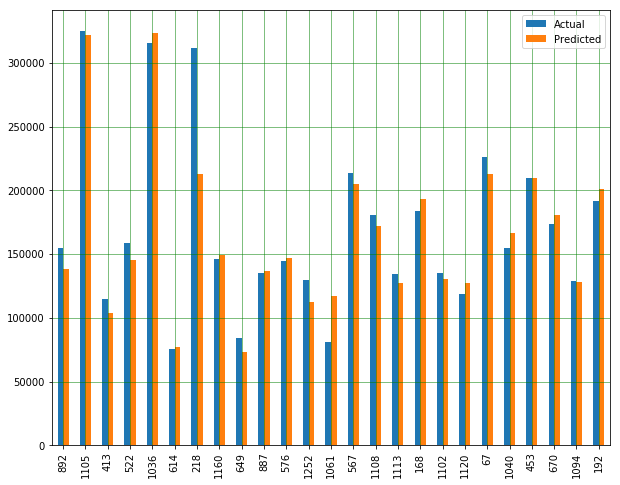

In [88]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()